In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
# reading datasets
book = pd.read_csv('/home/mahfuz/Desktop/recommendation_system/dataset/Books.csv',low_memory=False)
rating = pd.read_csv('/home/mahfuz/Desktop/recommendation_system/dataset/Ratings.csv')
users = pd.read_csv('/home/mahfuz/Desktop/recommendation_system/dataset/Users.csv')

In [3]:
# find the book insight
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# users
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
# rating
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Check the shape of the dataset

In [6]:
# find the shape of the datasets
print("Shape of the book dataset: ", book.shape)
print("Shape of the users dataset: ", users.shape)
print("Shape of the rating dataset: ", rating.shape)

Shape of the book dataset:  (271360, 8)
Shape of the users dataset:  (278858, 3)
Shape of the rating dataset:  (1149780, 3)


### Check the missing value in the dataset

In [7]:
# find the missing values in the book dataset
book_missing_value = book.isnull().sum()
print(book_missing_value)

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [8]:
# find the missing values in the user dataset
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [9]:
# find the missing values in the ratings dataset
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

### Check the duplicated values in the datasets

In [10]:
book.duplicated().sum()

0

In [11]:
users.duplicated().sum()

0

In [12]:
rating.duplicated().sum()

0

## Dataset EDA

### Book dataset

In [13]:
# find the dataset column
book.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [14]:
book.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [15]:
# drop last three columns image URL which will not use in this analysis
book.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1, inplace=True)
book.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

In [16]:
# describing a column

book['Year-Of-Publication'].describe()

count     271360
unique       118
top         2002
freq       17627
Name: Year-Of-Publication, dtype: object

In [17]:
# investigating the rows having 'DK Publishing Inc.' as year of Publications
book.loc[book['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [18]:
# investigating the rows having 'DK Publishing Inc.' as year of Publications
book.loc[book['Year-Of-Publication'] == 'HarperFlamingo Canada',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


In [19]:
# From above, it is seen that book Author is incorrectly loaded with bookTitle, hance making required corrections
# ISBN: 0789466953
book.loc[book['ISBN'] == '0789466953', 'Year-Of-Publication'] = 2000
book.loc[book['ISBN'] == '0789466953', 'Book-Author'] = "James Buckley"
book.loc[book['ISBN'] == '0789466953', 'publisher'] = "DK Publishing Inc"
book.loc[book['ISBN'] == '0789466953', 'Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [20]:
# investigating the rows having 'DK Publishing Inc.' as year of Publications
book.loc[book['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,NaN


In [21]:
# From above, it is seen that book Author is incorrectly loaded with bookTitle, hance making required corrections
# ISBN: 078946697X
book.loc[book['ISBN'] == '078946697X', 'Year-Of-Publication'] = 2000
book.loc[book['ISBN'] == '078946697X', 'Book-Author'] = "Michael Teitelbaum"
book.loc[book['ISBN'] == '078946697X', 'publisher'] = "DK Publishing Inc"
book.loc[book['ISBN'] == '078946697X', 'Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

# checking
book.loc[book['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,publisher


In [22]:
# rechecking
book.loc[(book['ISBN'] == '078946697X') | (book['ISBN'] == '0789466953') ,:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,http://images.amazon.com/images/P/078946697X.0...,DK Publishing Inc
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,http://images.amazon.com/images/P/0789466953.0...,DK Publishing Inc


In [23]:
#investigating the rows having 'Gallimard' as yearOfPublication
book.loc[book['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,NaN


In [24]:
#making required corrections as above, keeping other fields intact
book.loc[book.ISBN == '2070426769','Year-Of-Publication'] = 2003
book.loc[book.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
book.loc[book.ISBN == '2070426769','Publisher'] = "Gallimard"
book.loc[book.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


book.loc[book.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,NaN


In [25]:
# check 
book['Year-Of-Publication'] = pd.to_numeric(book['Year-Of-Publication'], errors='coerce')

print(sorted(book['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [26]:
''' We can look into the value, which we investigate, 
    value 0 is invalided, invalided keeping some margin in case dataset was updated therefore. 
    setting invalided year as NaN
'''
book.loc[(book['Year-Of-Publication'] > 2006) | (book['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = np.NAN

In [27]:
# replacing NaNs with mean value of Yead-Of-Publication 
book['Year-Of-Publication'].fillna(round(book['Year-Of-Publication'].mean()), inplace=True)

In [28]:
#rechecking
book['Year-Of-Publication'].isnull().sum()

0

In [29]:
#resetting the dtype as int32
book['Year-Of-Publication'] = book['Year-Of-Publication'].astype(np.int32)

In [30]:
# checking the publisher, exploreing the 'publisher' column
book.loc[book['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,NaN


In [31]:
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,NaN
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),NaN
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,NaN
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,NaN
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,NaN


In [32]:
book.drop(['publisher'], axis=1, inplace=True)
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [33]:
# checking the publisher, exploreing the 'publisher' column
book.loc[book['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [34]:
#investigating rows having NaNs
#Checking with rows having bookTitle as Tyrant Moon to see if we can get any clues
book.loc[(book['Book-Title'] == 'Tyrant Moon'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN


In [35]:
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [36]:
book.loc[(book['Book-Title']== 'Tyrant Moon'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN


In [37]:
book.loc[book.ISBN == '193169656X','Publisher'] = 'Farrar Straus Giroux'

In [38]:
book.loc[book['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [39]:
book.loc[book.ISBN == '1931696993','Publisher'] = 'Oxford University Press'

In [40]:
#Checking with rows having bookTitle as Finder Keepers to see if we can get any clues
book.loc[(book['Book-Author'] == 'Finders Keepers'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


In [41]:
book['Book-Author'].describe()

count              271358
unique             102020
top       Agatha Christie
freq                  632
Name: Book-Author, dtype: object

In [42]:
# checking the publisher, exploreing the 'publisher' column
book.loc[book['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


In [43]:
#checking by bookAuthor to find patterns
book.loc[(book['Book-Author'] == 'Elaine Corvidae'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,Farrar Straus Giroux
129001,0759901880,Wolfkin,Elaine Corvidae,2001,Hard Shell Word Factory


In [44]:
#checking by bookAuthor to find patterns
book.loc[(book['Book-Author'] == 'Linnea Sinclair'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,Oxford University Press


In [45]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  int32 
 4   Publisher            271360 non-null  object
dtypes: int32(1), object(4)
memory usage: 9.3+ MB


In [46]:
book.loc[book['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [47]:
book.loc[(book.ISBN == '0751352497'),'Book-Author'] = 'Unknown'
book.loc[(book.ISBN == '9627982032'),'Book-Author'] = 'Unknown'

In [48]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int32 
 4   Publisher            271360 non-null  object
dtypes: int32(1), object(4)
memory usage: 9.3+ MB


### Users

In [49]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [50]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


<Axes: >

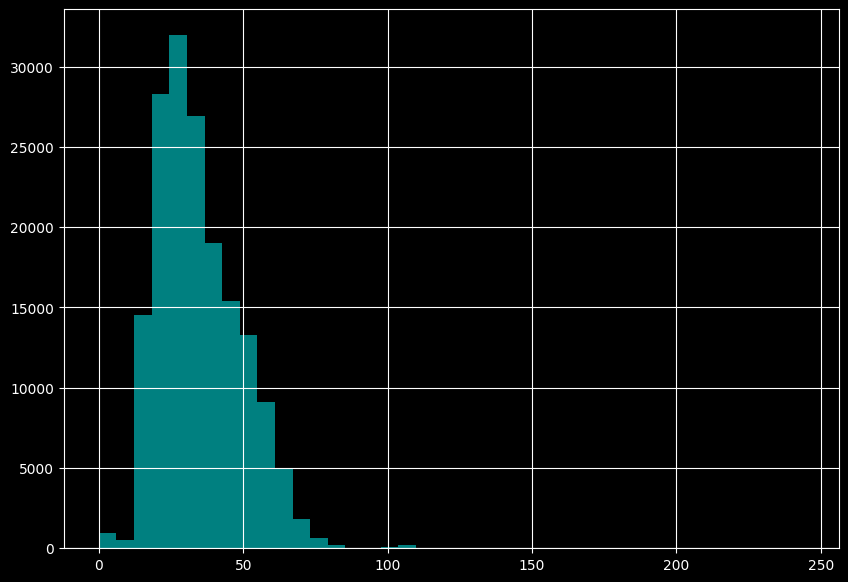

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
users['Age'].hist(bins=40, color='teal')

In [52]:
# This make sance that, value below 5 and abobe 90 don't make much sence for our book rating case,
# hence replacing theres by NaNs
users.loc[(users['Age'] > 90) | (users['Age'] < 5)].value_counts

users.loc[(users['Age'] > 90) | (users['Age'] < 5)] = np.nan

In [53]:
# replacing NaNs with mean,
users['Age'] = users.Age.fillna(users.Age.mean())

users['Age'].isnull().sum()

0

In [54]:
#setting the data type as int
users.Age = users.Age.astype(np.int32)

<Axes: ylabel='Age'>

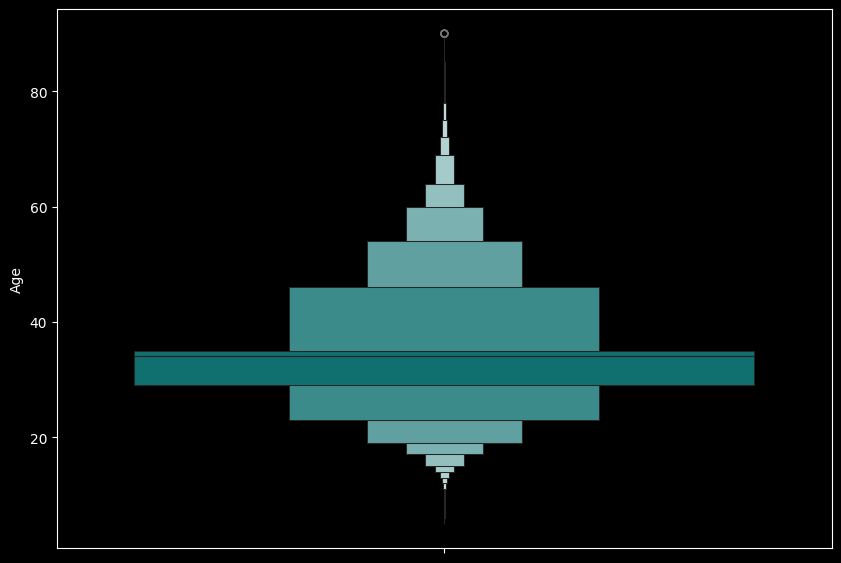

In [55]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.boxenplot(users.Age, color='teal')

In [56]:
! pip install seaborn

In [57]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   277546 non-null  float64
 1   Location  277546 non-null  object 
 2   Age       278858 non-null  int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 5.3+ MB


### Rating counting

In [58]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [59]:
rating.shape

(1149780, 3)

In [60]:
# rating dataset will have n_user*n_books entries if every user rated every item,
# his shows that the dataset is very sparse

n_users = users.shape[0]
n_book = book.shape[0]

n_book*n_users

75670906880

In [61]:
rating['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [62]:
#ratings dataset should have books only which exist in our books dataset, 
#unless new books are added to books dataset

ratings_new = rating[rating['ISBN'].isin(book.ISBN)]

rating.shape, ratings_new.shape

((1149780, 3), (1031136, 3))

In [63]:
#ratings dataset should have ratings from users which exist in users dataset, unless new users are added to users dataset
ratings = rating[rating['User-ID'].isin(users['User-ID'])]

print(ratings.shape)
print(ratings_new.shape)

(n_users), (n_book)

(1142978, 3)
(1031136, 3)


(278858, 271360)

In [64]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [65]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

(1031136, 3)
(383842, 3)
(647294, 3)


/tmp/ipykernel_23172/3893668393.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings_explicit , x ='Book-Rating', palette='rocket_r', legend=False)


<Axes: xlabel='Book-Rating', ylabel='count'>

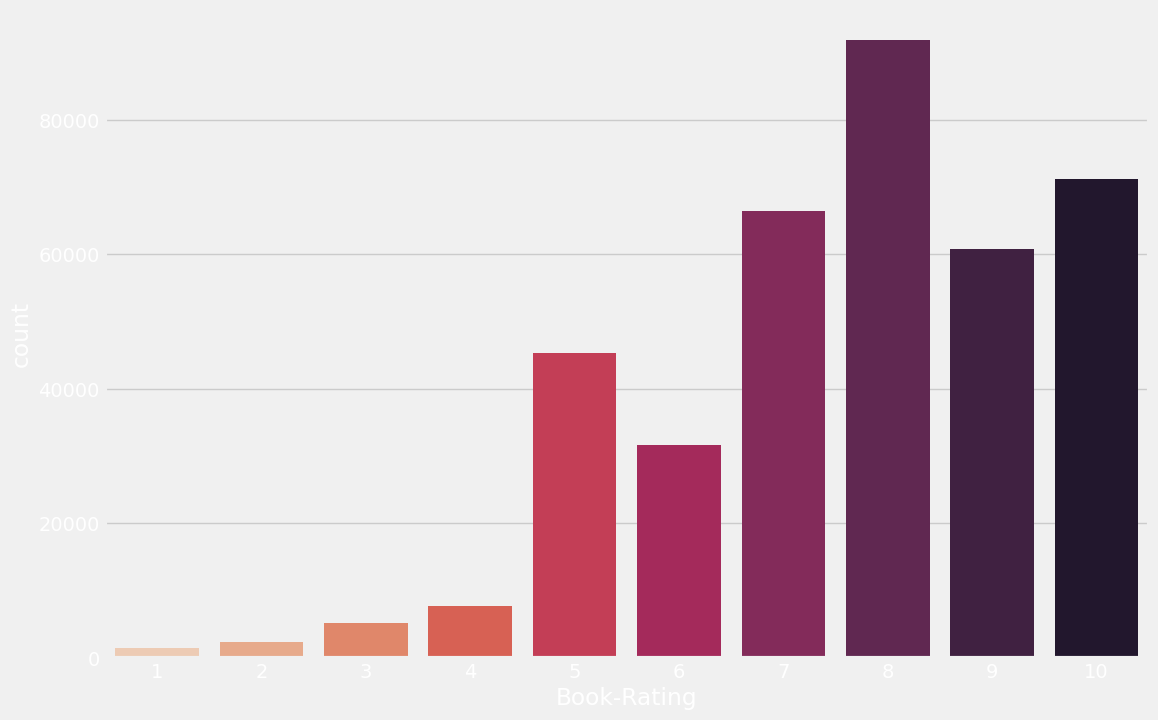

In [66]:
print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x ='Book-Rating', palette='rocket_r', legend=False)

### Top Popularity Based Recommendation

In [67]:
rating_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['Book-Rating'].sum())

In [68]:
top10 = rating_count.sort_values('Book-Rating', ascending=False).head()

top10.merge(book, left_index=True, right_on = 'ISBN')

,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books


## Model Building

### Popularity Based Recommender System

In [69]:
books = pd.read_csv('/home/mahfuz/Desktop/recommendation_system/dataset/Books.csv')
book_rating = pd.read_csv('/home/mahfuz/Desktop/recommendation_system/dataset/Ratings.csv')
ratings_with_name = book_rating.merge(books, on='ISBN')

/tmp/ipykernel_23172/1259139196.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/home/mahfuz/Desktop/recommendation_system/dataset/Books.csv')


In [70]:
book_rating.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [71]:
ratings_with_name.shape

(1031136, 10)

In [72]:
ratings_with_name[['Book-Title','Book-Author','Year-Of-Publication']].groupby('Book-Title').count()

,Book-Author,Year-Of-Publication
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,4
Always Have Popsicles,1,1
Apple Magic (The Collector's series),1,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1,1
...,...,...
Ã?Â?lpiraten.,2,2
Ã?Â?rger mit Produkt X. Roman.,4,4
Ã?Â?sterlich leben.,1,1


In [73]:
no_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
no_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [74]:
no_rating_df.rename(columns={'Book-Rating':'rating_no'}, inplace=True)
no_rating_df

,Book-Title,rating_no
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [75]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()

In [76]:
avg_rating_df.rename(columns={'Book-Rating':'avg_ratings'}, inplace=True)
avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [77]:
popular_df = no_rating_df.merge(avg_rating_df, on='Book-Title')
popular_df

,Book-Title,rating_no,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [78]:
popular_df = popular_df[popular_df['rating_no'] >= 250].sort_values('avg_ratings', ascending=False).head(50)

In [79]:
popular_df.merge(books, on='Book-Title').drop_duplicates('Book-Title').drop_duplicates('Book-Title')

,Book-Title,rating_no,avg_ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
16,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,0345339681,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...
17,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,0345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
26,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,059035342X,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
28,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,0345339711,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...
39,To Kill a Mockingbird,510,4.700000,0446310786,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...


In [80]:
popular_df.columns

Index(['Book-Title', 'rating_no', 'avg_ratings'], dtype='object')

In [81]:
popular_df = popular_df.merge(books, on='Book-Title').drop_duplicates('Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author','Image-URL-M','rating_no','avg_ratings']]

In [82]:
popular_df

,Book-Title,Book-Author,Image-URL-M,rating_no,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [83]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


### Collaborative Filtering Based Recommender System

In [84]:
x = ratings_with_name.groupby('User-ID')['Book-Rating'].count() > 200
porasona_users = x[x].index

In [85]:
filter_rating = ratings_with_name[ratings_with_name['User-ID'].isin(porasona_users)]

In [86]:
y = filter_rating.groupby('Book-Title')['Book-Rating'].count() > 50

famouns_books = y[y].index

In [87]:
final_ratings = filter_rating[filter_rating['Book-Title'].isin(famouns_books)]

In [88]:
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [89]:
pt = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

In [90]:
pt.fillna(0, inplace=True)

In [91]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
from sklearn.metrics.pairwise import cosine_similarity

In [93]:
similarity_score = cosine_similarity(pt)

In [94]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])), key=lambda x:x[1], reverse=True)[1:6]

    for i in similar_items:
        print(pt.index[i[0]])

In [95]:
recommend('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [96]:
recommend('Message in a Bottle')

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes


In [97]:
recommend('The Notebook')

A Walk to Remember
The Rescue
One Door Away from Heaven
Toxin
The Five People You Meet in Heaven


In [100]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)


In [98]:
popular_df['Image-URL-M'][3]

'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'

In [99]:
pt.index[545]

'The Loop'

In [101]:
# Convert the data in a pickle file
import pickle
pickle.dump(popular_df, open('popular.pkl', 'wb'))

In [103]:
popular_df.columns

Index(['Book-Title', 'Book-Author', 'Image-URL-M', 'rating_no', 'avg_ratings'], dtype='object')

In [119]:
popular_df['Image-URL-M'].iloc[-1]

'http://images.amazon.com/images/P/0316284955.01.MZZZZZZZ.jpg'

In [131]:
def recommend_v1(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])), key=lambda x:x[1], reverse=True)[1:6]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)

    return data

In [132]:
recommend_v1('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [134]:
pickle.dump(pt, open('pt.pkl', 'wb'))
pickle.dump(books, open('books.pkl', 'wb'))
pickle.dump(similarity_score, open('similarity_score.pkl', 'wb'))